# Data Exploration

I do part 1. Data Exploration and  2. Data Preprocessing base on this link(https://github.com/kennedykwangari/Mall-Customer-Segmentation-Data/blob/master/Data%20Understanding%20(3).ipynb)

In [1]:
import numpy as np #
import pandas as pd #
from pandas import plotting
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff



In [2]:
dataset = pd.read_csv('Mall_Customers.csv')
dataset.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
# Checking for any Missing Values

missing_df =dataset.isnull().sum(axis=0).reset_index()
missing_df.columns = ['Column Name', 'Missing Values Count']
missing_df['Filling Factor (%)']=(dataset.shape[0]-missing_df['Missing Values Count'])/dataset.shape[0]*100
missing_df.sort_values('Filling Factor (%)').reset_index(drop = True)


,Column Name,Missing Values Count,Filling Factor (%)
0,CustomerID,0,100.0
1,Gender,0,100.0
2,Age,0,100.0
3,Annual Income (k$),0,100.0
4,Spending Score (1-100),0,100.0


In [4]:
print('This dataset contains ',dataset.shape[0],'rows')
print('This dataset contains ',dataset.shape[1],'columns')



This dataset contains  200 rows
This dataset contains  5 columns


In [5]:
print("Mean of Annual Income (k$) of Female:",dataset['Annual Income (k$)'].loc[dataset['Gender'] == 'Female'].mean())
print("Mean of Annual Income (k$) of Male:",dataset['Annual Income (k$)'].loc[dataset['Gender'] == 'Male'].mean())



Mean of Annual Income (k$) of Female: 59.25
Mean of Annual Income (k$) of Male: 62.22727272727273


<Axes: ylabel='Gender'>

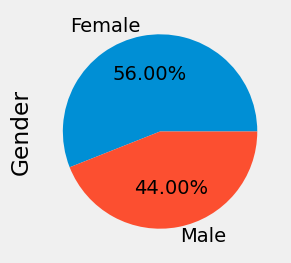

In [6]:


plt.figure(figsize=(3,3))
pd.Series(dataset['Gender']).value_counts().plot(kind ='pie', autopct='%1.2f%%')



In [7]:
dataset['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [8]:
dataset.groupby('Gender').mean()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,,
Female,97.562500,38.098214,59.250000,51.526786
Male,104.238636,39.806818,62.227273,48.511364



Plotting the Annual Income Column vs the Spending Score


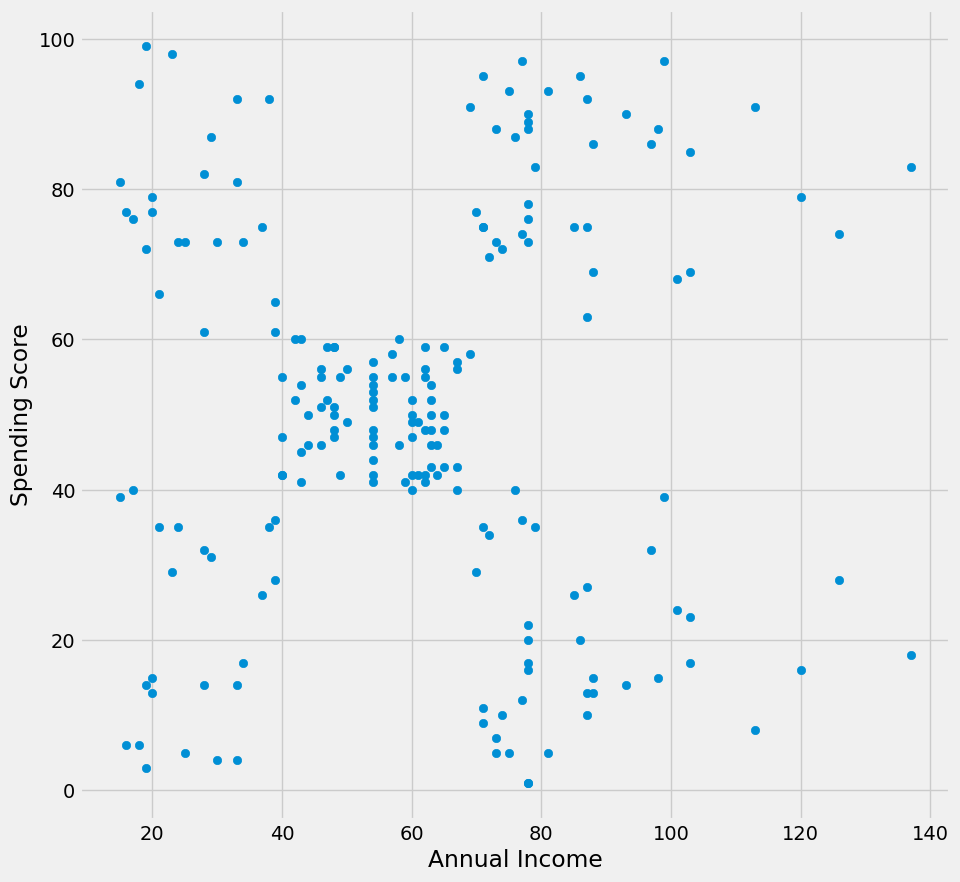

In [10]:
plt.figure(figsize = (10, 10))
plt.scatter(dataset["Annual Income (k$)"], dataset["Spending Score (1-100)"])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()


<ipython-input-11-51f85285ddc4>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-11-51f85285ddc4>:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-11-51f85285ddc4>:9: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code 

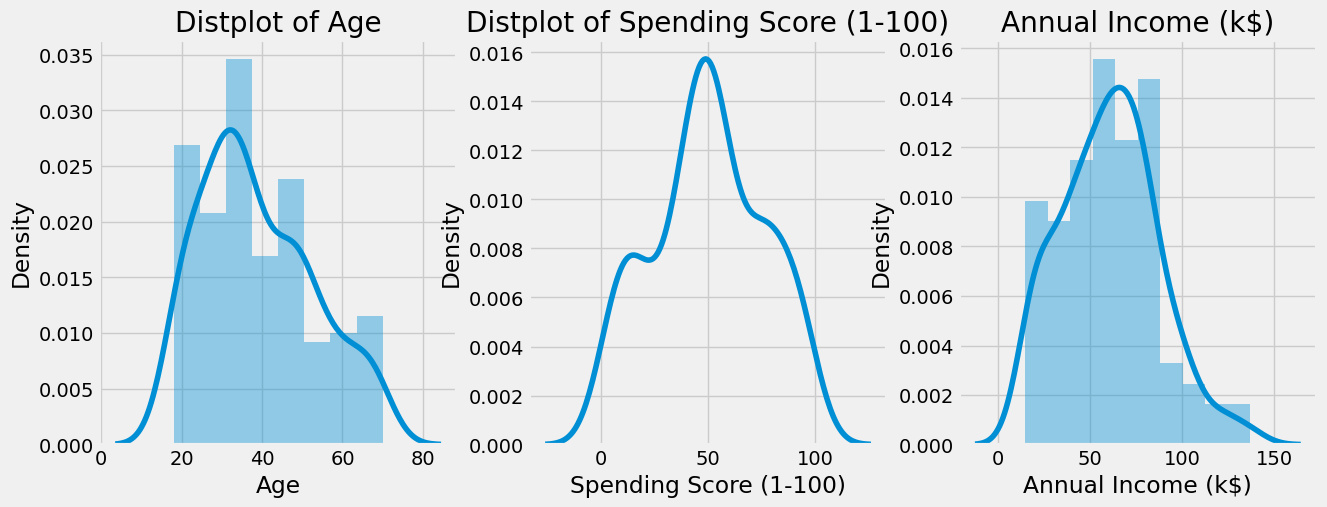

In [11]:
plt.figure(figsize=(14,5))
plt.subplot(1,3,1)
sns.distplot(dataset['Age'])
plt.title('Distplot of Age')
plt.subplot(1,3,2)
sns.distplot(dataset['Spending Score (1-100)'],hist=False)
plt.title('Distplot of Spending Score (1-100)')
plt.subplot(1,3,3)
sns.distplot(dataset['Annual Income (k$)'])
plt.title('Annual Income (k$)')
plt.show()

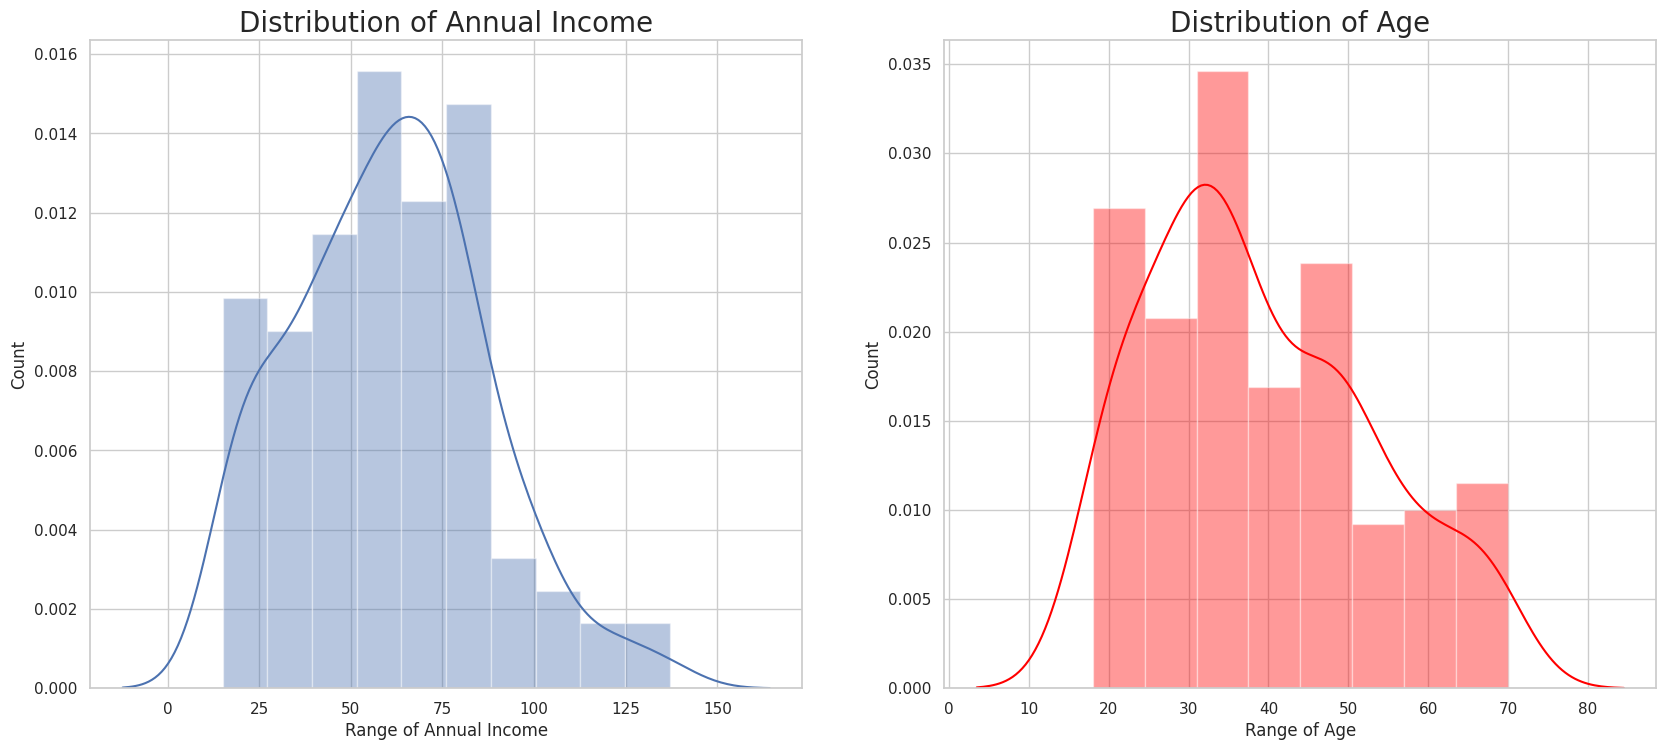

In [16]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (18, 8)

plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(dataset['Annual Income (k$)'])
plt.title('Distribution of Annual Income', fontsize = 20)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')


plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(dataset['Age'], color = 'red')
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.show()



Here, In the above Plots we can see the Distribution pattern of Annual Income and Age, By looking at the plots,

we can infer one thing that There are few people who earn more than 100 US Dollars. Most of the people have an earning of around 50-75 US Dollars. Also, we can say that the least Income is around 20 US Dollars.

Taking inferences about the Customers.

The most regular customers for the Mall has age around 30-35 years of age. Whereas the the senior citizens age group is the least frequent visitor in the Mall. Youngsters are lesser in umber as compared to the Middle aged people.


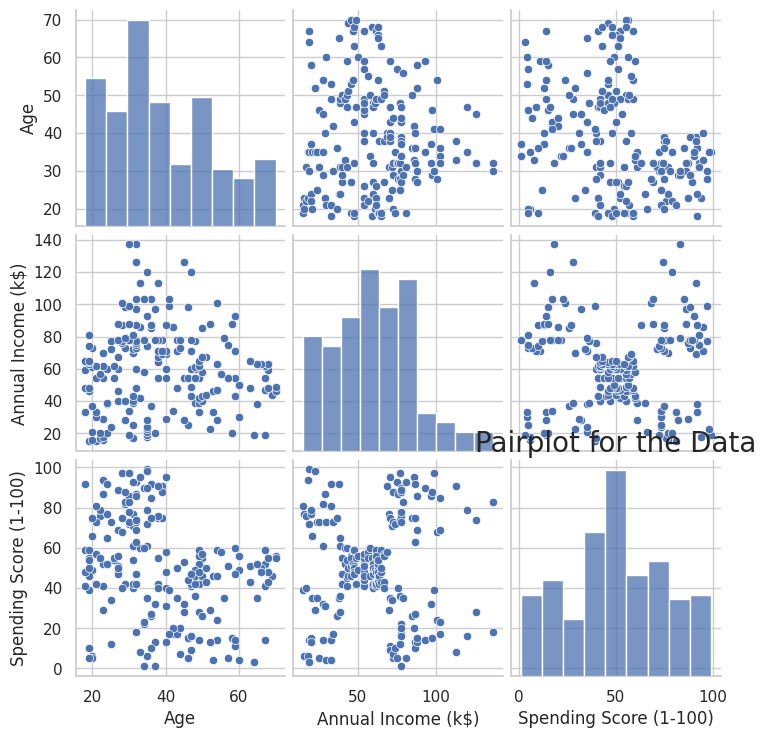

In [24]:
sns.pairplot(dataset[['Age','Annual Income (k$)','Spending Score (1-100)']])
plt.title('Pairplot for the Data', fontsize = 20)
plt.show()

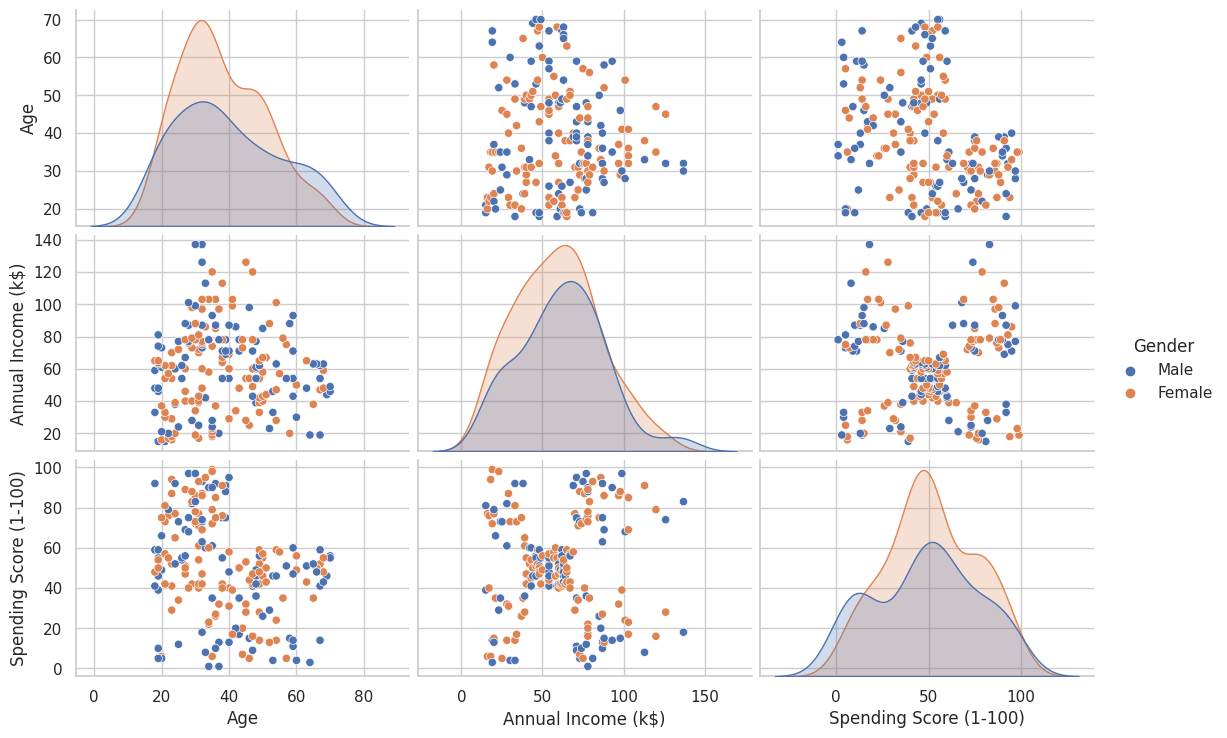

In [25]:
# Let's see our data in a detailed way with pairplot
X = dataset.drop(['CustomerID', 'Gender'], axis=1)
sns.pairplot(dataset.drop('CustomerID', axis=1), hue='Gender', aspect=1.5)
plt.show()


From the above plot we see that gender has no direct relation to segmenting customers. That's why we can drop it and move on with other features which is why we will X parameter from now on.


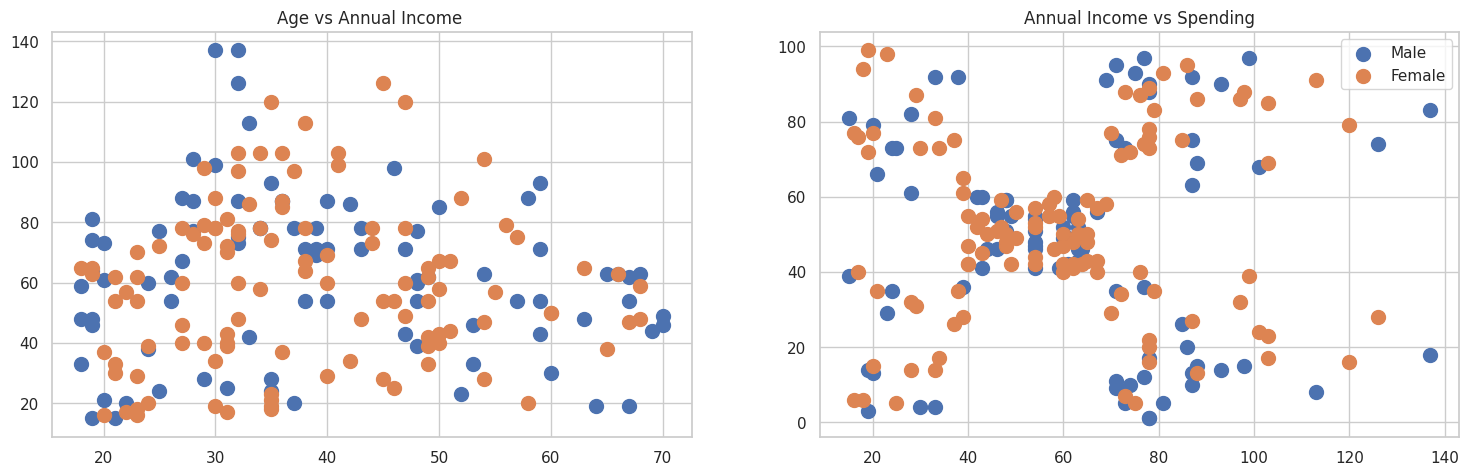

In [26]:
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Annual Income (k$)' , data = dataset[dataset['Gender'] == gender] ,label = gender,s=100)
    plt.title('Age vs Annual Income ')
plt.subplot(1,3,2)
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)' ,data = dataset[dataset['Gender'] == gender] ,s = 100 , label = gender)
    plt.title('Annual Income vs Spending')
plt.legend()
plt.show()


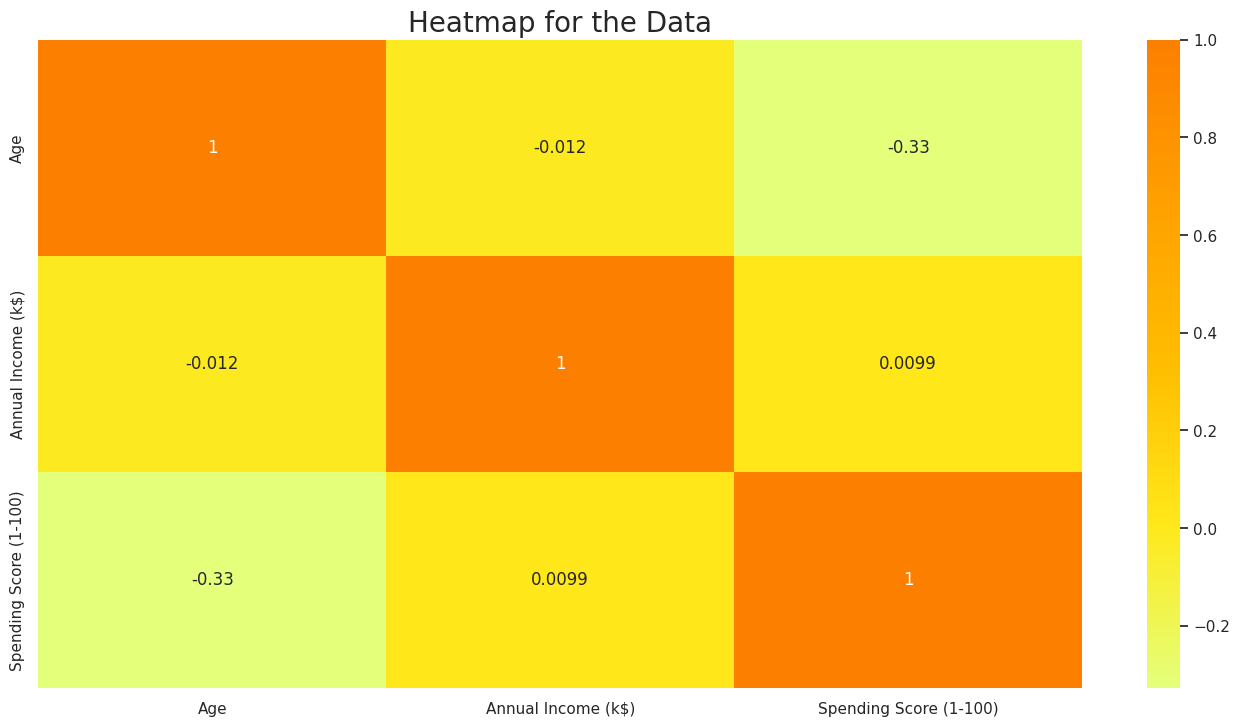

In [28]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(dataset[['Age','Annual Income (k$)','Spending Score (1-100)']].corr(), cmap = 'Wistia', annot = True)
plt.title('Heatmap for the Data', fontsize = 20)
plt.show()




The Above Graph for Showing the correlation between the different attributes of the Mall Customer Segementation Dataset, This Heat map reflects the most correlated features with Orange Color and least correlated features with yellow color.

We can clearly see that these attributes do not have good correlation among them, that's why we will proceed with all of the features.



# The Model Building Process



**Feature Selection for Model Building Purposes**

Here we will consider only 2 features (Annual income and Spending Score) and no Label Available

In [65]:
X= dataset.iloc[:, [3,4]].values

***`Gaussian Mixture Model`***

In [66]:
def gaussian(X, mu, sigma):
    d = X.shape[1]
    det = np.linalg.det(sigma)
    inv = np.linalg.inv(sigma)
    term1 = 1 / (np.sqrt((2 * np.pi)**d * det))
    term2 = np.exp(-0.5 * np.sum((X - mu).dot(inv) * (X - mu), axis=1))
    return term1 * term2

def gmm(X, num_clusters, max_iterations=100, tolerance=1e-4):
    n, d = X.shape

    # Initialize cluster means and covariance matrices
    means = X[np.random.choice(n, num_clusters, replace=False), :]
    covs = np.tile(np.diag(np.var(X, axis=0)), (num_clusters, 1, 1))

    # Initialize mixture weights
    weights = np.ones(num_clusters) / num_clusters

    # Initialize log-likelihood and iterate until convergence
    prev_log_likelihood = -np.inf
    for i in range(max_iterations):
        # E-Step: Compute the responsibilities for each data point
        p = np.array([weights[k] * gaussian(X, means[k], covs[k, :, :]) for k in range(num_clusters)]).T
        responsibilities = p / np.sum(p, axis=1, keepdims=True)

        # M-Step: Update the model parameters
        Nk = np.sum(responsibilities, axis=0)

        # Update mean
        means = responsibilities.T.dot(X) / Nk[:, np.newaxis]

        # Update covariance matrix
        for k in range(num_clusters):
            X_centered = X - means[k]
            covs[k] = (responsibilities[:, k, np.newaxis] * X_centered).T.dot(X_centered) / Nk[k]

        # Update mixture weights
        weights = Nk / n

        # Check for convergence
        log_likelihood = np.sum(np.log(np.sum(p, axis=1)))
        if log_likelihood - prev_log_likelihood < tolerance:
            break
        prev_log_likelihood = log_likelihood

    # Compute the BIC and AIC values for this model
    k = num_clusters
    n_params = k * (d + d*(d+1)/2 + 1)
    log_likelihood = np.sum(np.log(np.sum(p, axis=1)))
    bic = -2*log_likelihood + n_params*np.log(n)
    aic = -2*log_likelihood + n_params*2

    # Assign each point to its most likely cluster
    labels = np.argmax(responsibilities, axis=1)

    return labels, means, covs, weights, bic, aic

In [45]:
# labels, means, covs, weights = gmm(X, 5)



Model Building Process


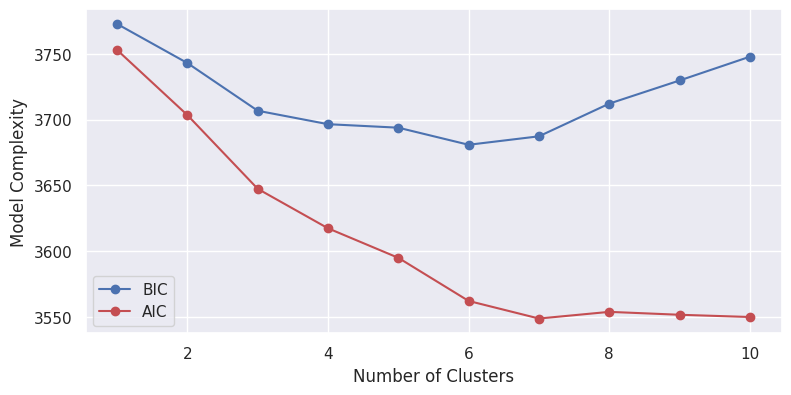

In [67]:
import numpy as np
import matplotlib.pyplot as plt


# Define the range of number of clusters to try
K_range = range(1, 11)

# Initialize arrays to store BIC and AIC values for each model
bic_values = np.zeros(len(K_range))
aic_values = np.zeros(len(K_range))

# Fit a GMM to the data for each number of clusters and compute BIC and AIC values
for i, k in enumerate(K_range):
    labels, means, covs, weights, bic, aic = gmm(X, k)
    bic_values[i] = bic
    aic_values[i] = aic

# Plot BIC and AIC values versus number of clusters
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(K_range, bic_values, 'bo-', label='BIC')
ax.plot(K_range, aic_values, 'ro-', label='AIC')
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Model Complexity')
plt.legend()
plt.show()

# Select the number of clusters that minimizes the BIC or AIC
best_k = K_range[np.argmin(bic_values)]



In [69]:
print(best_k)

6


In [79]:
labels, means, covs, weights, bic, aic = gmm(X, 6)


In [80]:
print(labels)

[0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0
 4 5 4 5 4 5 3 5 3 3 5 5 5 3 3 3 3 5 5 3 5 3 5 3 3 3 3 3 3 3 3 3 5 3 5 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 5 5 5 3 5 3 3 3 3 3 3 3 3 3 3 3 5 5 5 3 3 3 3 3 3
 5 3 3 3 3 3 5 3 5 5 3 5 1 3 1 3 1 2 5 2 5 3 5 2 1 2 5 2 5 2 1 3 1 2 1 3 5
 2 1 2 1 2 5 2 1 2 1 2 5 3 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


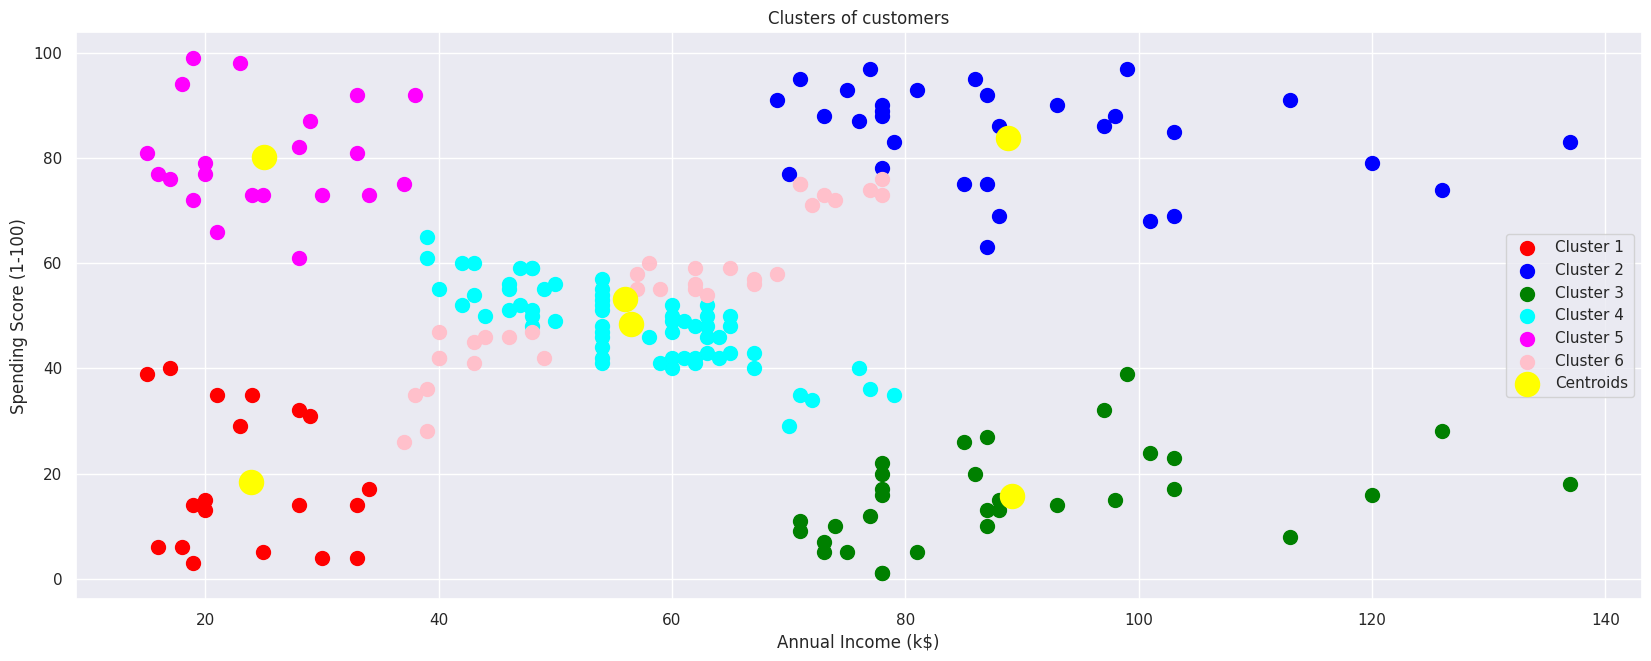

In [81]:


plt.scatter(X[labels == 0, 0], X[labels == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[labels == 1, 0], X[labels == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[labels == 2, 0], X[labels == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[labels == 3, 0], X[labels == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[labels == 4, 0], X[labels == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(X[labels == 5, 0], X[labels == 5, 1], s = 100, c = 'pink', label = 'Cluster 6')

plt.scatter(means[:, 0], means[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()



This Clustering Analysis gives us a very clear insight about the different segments of the customers in the Mall.

There are clearly Five segments of Customers namely Cluster 1, Cluster 2, Cluster 3, Cluster 4, Cluster 5, Cluster 6 based on their Annual Income and Spending Score which are reportedly the best factors/attributes to determine the segments of a customer in a Mall.

**Model Interpretation**

Cluster 1 (Red Color) -> earning low , spending less

Cluster 2 (Blue Color) -> earning high , spending high [TARGET SET]

Cluster 3 (Green Color) -> earning high but spending low [TARGET SET]

Cluster 4 (Cyan Color) ->  earning average  and spend in indirect to earning

Cluster 5 (Magenta Color) -> Earning less , spending high [TARGET SET]

Cluster 6 (pink color) ->  earning average  and spend in direct to earning

We can put Cluster 2 into some alerting system where email can be send to them on daily basis as these re easy to converse . Also, we can email Cluster 3 because it is possible that this group of rich people will be attracted to us by advertising our products and their capital will also be attracted But we must be careful to send a message to this group only in a few periods and if they are not attracted again, we should refrain from spending money on them.

We must respect to Cluster 5 because and have not lost them because they give good achivment to us despite they haven't good situation and also we can infer that the advirtisment have more effect on them .


**Clusters of Customers Based on their Ages**

In [100]:


Y = dataset.iloc[:, [2, 4]].values
Y.shape



(200, 2)

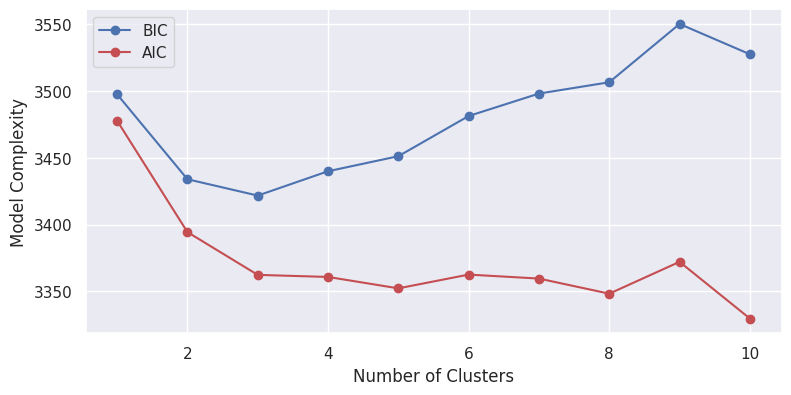

In [83]:
# Define the range of number of clusters to try
K_range = range(1, 11)

# Initialize arrays to store BIC and AIC values for each model
bic_values = np.zeros(len(K_range))
aic_values = np.zeros(len(K_range))

# Fit a GMM to the data for each number of clusters and compute BIC and AIC values
for i, k in enumerate(K_range):
    labels, means, covs, weights, bic, aic = gmm(Y, k)
    bic_values[i] = bic
    aic_values[i] = aic

# Plot BIC and AIC values versus number of clusters
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(K_range, bic_values, 'bo-', label='BIC')
ax.plot(K_range, aic_values, 'ro-', label='AIC')
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Model Complexity')
plt.legend()
plt.show()

# Select the number of clusters that minimizes the BIC or AIC
best_k = K_range[np.argmin(bic_values)]


In [84]:
print(best_k)

3


In [107]:
labels, means, covs, weights, bic, aic = gmm(Y, 3)


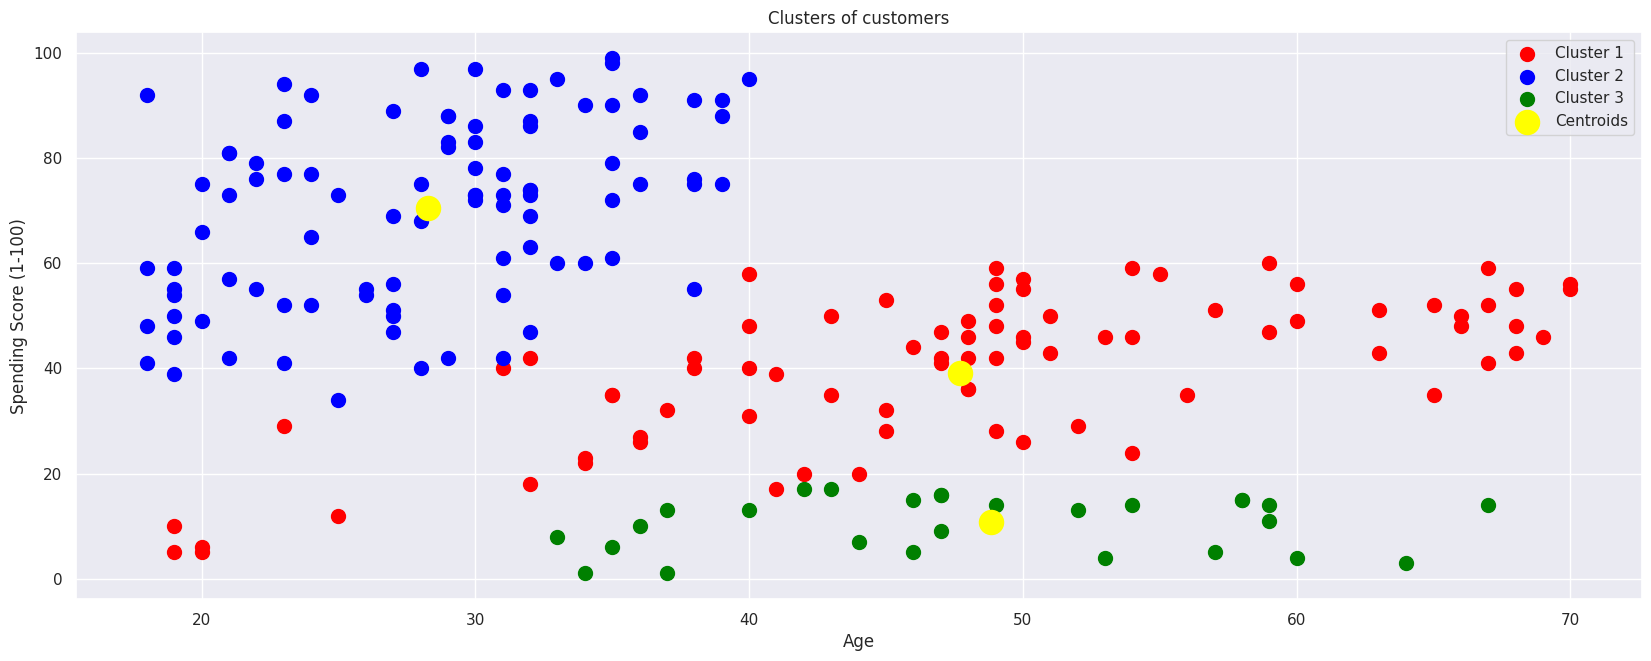

In [108]:

plt.scatter(Y[labels == 0, 0], Y[labels == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(Y[labels == 1, 0], Y[labels == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(Y[labels == 2, 0], Y[labels == 2, 1], s = 100, c = 'green', label = 'Cluster 3')


plt.scatter(means[:, 0], means[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

From this type of observation, it can be seen that our young age group, who came in blue color, have the highest amount of purchases, so the products that should be advertised should be from this category by examining the products that this group buys.

**Clusters of Customers Based on their Ages and their income**

In [109]:
Z = dataset.iloc[:, [2,3,4]].values
Z.shape


(200, 3)

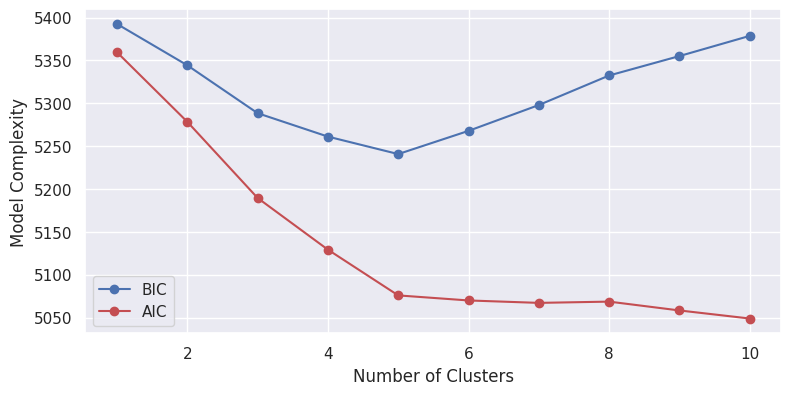

In [110]:
# Define the range of number of clusters to try
K_range = range(1, 11)

# Initialize arrays to store BIC and AIC values for each model
bic_values = np.zeros(len(K_range))
aic_values = np.zeros(len(K_range))

# Fit a GMM to the data for each number of clusters and compute BIC and AIC values
for i, k in enumerate(K_range):
    labels, means, covs, weights, bic, aic = gmm(Z, k)
    bic_values[i] = bic
    aic_values[i] = aic

# Plot BIC and AIC values versus number of clusters
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(K_range, bic_values, 'bo-', label='BIC')
ax.plot(K_range, aic_values, 'ro-', label='AIC')
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Model Complexity')
plt.legend()
plt.show()

# Select the number of clusters that minimizes the BIC or AIC
best_k = K_range[np.argmin(bic_values)]


In [111]:
print(best_k)

5


In [104]:
labels, means, covs, weights, bic, aic = gmm(Z, 5)


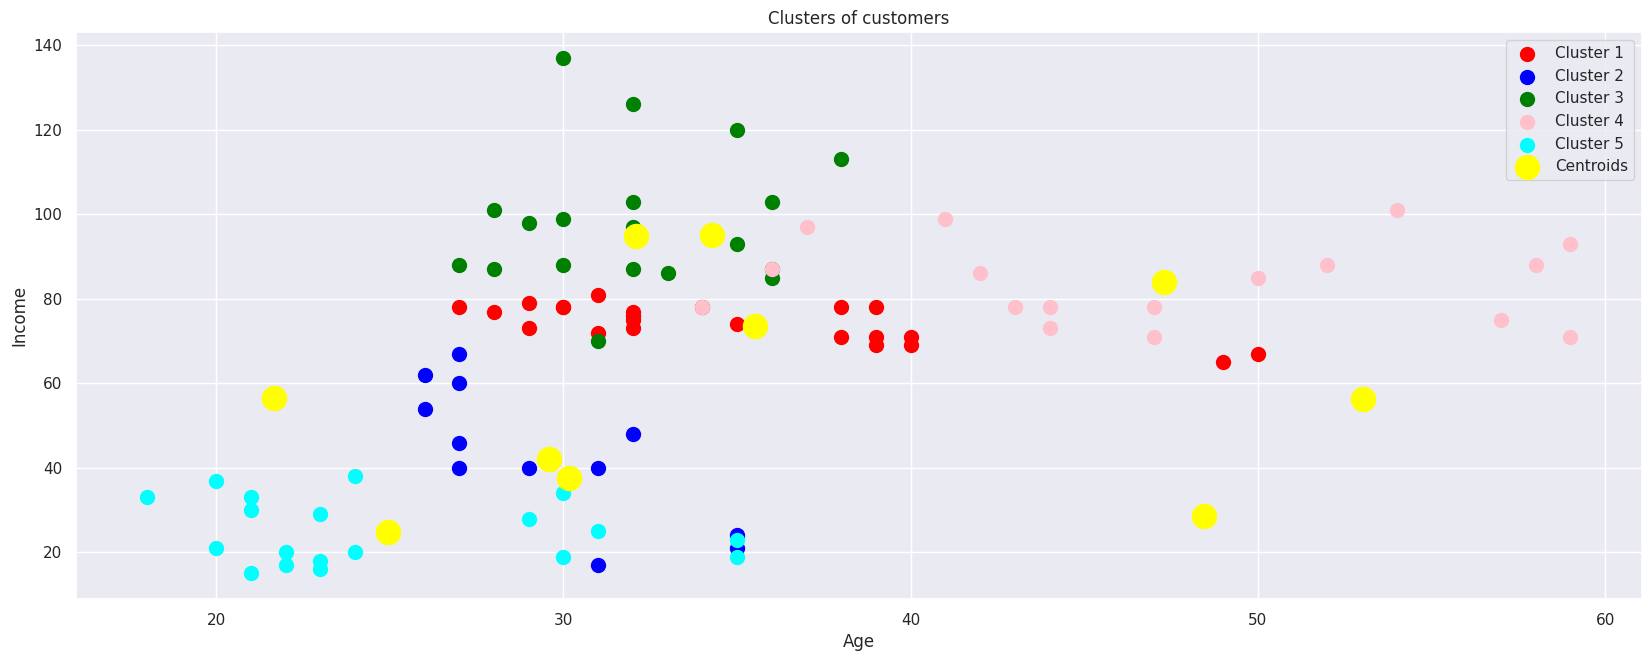

In [112]:
plt.scatter(Z[labels == 0, 0], Z[labels == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(Z[labels == 1, 0], Z[labels == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(Z[labels == 2, 0], Z[labels == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(Z[labels == 3, 0], Z[labels == 3, 1], s = 100, c = 'pink', label = 'Cluster 4')
plt.scatter(Z[labels == 4, 0], Z[labels == 4, 1], s = 100, c = 'Cyan', label = 'Cluster 5')


plt.scatter(means[:, 0], means[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.show()

As we can see, the young people between 30 and 40 years have the highest income.

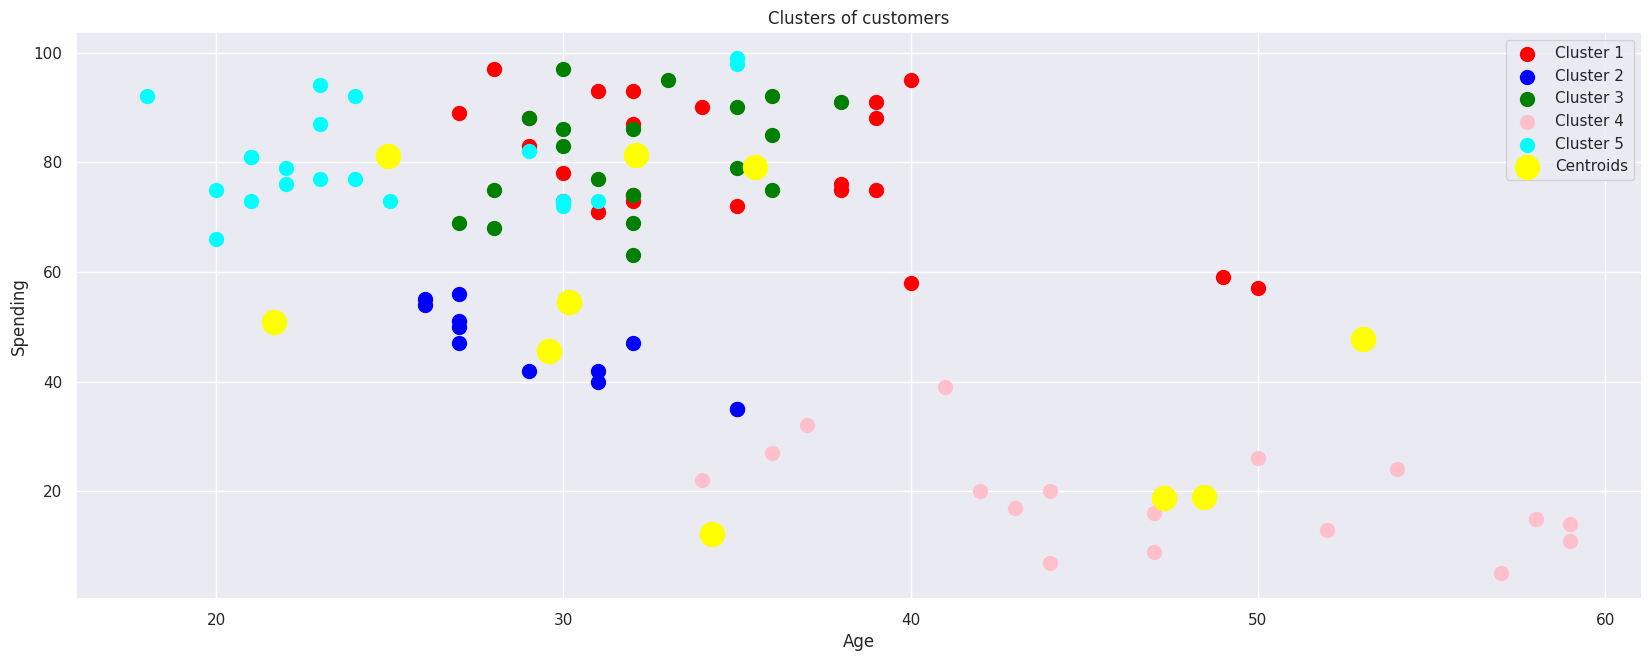

In [113]:
plt.scatter(Z[labels == 0, 0], Z[labels == 0, 2], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(Z[labels == 1, 0], Z[labels == 1, 2], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(Z[labels == 2, 0], Z[labels == 2, 2], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(Z[labels == 3, 0], Z[labels == 3, 2], s = 100, c = 'pink', label = 'Cluster 4')
plt.scatter(Z[labels == 4, 0], Z[labels == 4, 2], s = 100, c = 'Cyan', label = 'Cluster 5')


plt.scatter(means[:, 0], means[:, 2], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Spending')
plt.legend()
plt.show()

As it was found from this classification, the young group with the lowest income and the highest income are usually considered among the high-spending customers of the store and they try to spend the most, so it is better to use the results obtained and as much as we can The email should be such that we keep this layer.